#1.- Busca en internet un csv de regresión y aplícale los algoritmos Random Forest, XGBoost, SVM kernel RBF, SVM kernel Linear y SVM Polinómico. Para cada uno de ellos tienes que obtener la matriz de confusión, el error cuadrático medio y el R2 score.

In [1]:
import pandas as pd
import numpy as np 
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

Para los ejercicios de regresión voy a utilizar un csv que debería ser útil y consta de 8 columnas y 50.000 filas.

Con 50.000 filas los modelos SVR linear y polinómico tardan 50 minutos y 3h 40min en entrenarse, además de no tener resultados muy buenos.
Para compbrobar que funciona si quieres reduce en número de filas en la segunda línea de código.
Voy a adjuntar capturas con los resultados de los SVR con 50.000 filas por si los quieres comparar con el resto, aunque son mucho peores, teniendo un MSE de 1-1.5 cuando el resto ronda el 0.1-0.2 y un R2 de 0.3-0.03 cuando el resto roza el 0.9

In [2]:
df=pd.read_csv("APY.csv")
df=df[:50000]
#Reemplazar las toneladas de producción para que no cuenten por nulas
df["Production"]=df["Production"].fillna("0.0001")
temporadas=df["Season"].unique()

Lo primero es pasar todas las columnas objeto a categóricas

In [3]:
obj_cols = df.select_dtypes(include="object").columns
for col in obj_cols:
  df[col] = pd.Categorical(df[col])

cat_cols = df.select_dtypes(include="category").columns
for col in cat_cols:
  df[col] = df[col].cat.codes

df

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
0,0,93,0,2007,1,2439.6,3165,1.40
1,0,93,0,2007,2,1626.4,2224,1.40
2,0,93,0,2008,0,4147.0,2894,0.74
3,0,93,0,2008,3,4147.0,2562,0.64
4,0,93,0,2009,0,4153.0,2939,0.75
...,...,...,...,...,...,...,...,...
49995,4,112,24,2003,2,2468.0,2423,1.01
49996,4,112,24,2004,2,4202.0,2026,0.49
49997,4,112,24,2005,2,4678.0,3759,0.91
49998,4,112,24,2006,2,3208.0,3152,1.06


Como columna target (Y) voy a elegir "Season" ya que me parece que las predicciones más útiles van a ser sobre esa columna, 

In [4]:
Y=df["Season"]
X=df.drop(columns="Season")
temporadas_codes=df["Season"].unique()
print(f"Temporadas:{temporadas}\nCódigos:{temporadas_codes}")

Temporadas:['Kharif     ' 'Rabi       ' 'Autumn     ' 'Summer     ' 'Whole Year '
 'Winter     ']
Códigos:[1 2 0 3 4 5]


Ahora voy a normalizar X 

In [5]:
scaler=StandardScaler()
X1=scaler.fit_transform(X)

Dividir en train y test

In [6]:
X_train,X_test,Y_train,Y_test=train_test_split(X1,Y, test_size=0.2,random_state=0)

Definir el umbral para los tests

In [7]:
umbral=0.6

# Random Forest

In [8]:
from numpy import mean, std
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score, RepeatedKFold

In [9]:
RandomForest = RandomForestRegressor()
RandomForest.fit(X_train, Y_train)

RandomForestRegressor()

In [10]:
rf_y_test_pred = RandomForest.predict(X_test)


rf_y_test_umbralizada = 1 * (rf_y_test_pred[:] > umbral)

Matriz de confusión

In [11]:
print(u"Matriz de confusión\n", confusion_matrix(Y_test,rf_y_test_umbralizada))


Matriz de confusión
 [[ 119  139    0    0    0    0]
 [   1 3341    0    0    0    0]
 [   3 3431    0    0    0    0]
 [   5  302    0    0    0    0]
 [   0 2544    0    0    0    0]
 [   0  115    0    0    0    0]]


MSE

In [13]:
print(F"Error cuadrático medio: {mean_squared_error(Y_test, rf_y_test_pred)}")

Error cuadrático medio: 0.11242002287003652


R2

In [14]:
rf_train_pred = RandomForest.predict(X_train)
rf_test_pred = RandomForest.predict(X_test)
print('La R^2 en los datos de train es: {}'.format(np.round(r2_score(Y_train, rf_train_pred),4)))
print('La R^2 en los datos de test es: {}'.format(np.round(r2_score(Y_test, rf_test_pred),4)))

La R^2 en los datos de train es: 0.9893
La R^2 en los datos de test es: 0.9276


# XGBoost

In [15]:
import xgboost 

In [16]:
xgb = xgboost.XGBRegressor()
params = {"eta": [0.3, 0.5], "lambda":[0.5, 1.0], "max_depth": [3, 7]}
xgb_opt = GridSearchCV(xgb, params, cv=3)
xgb_opt.fit(X_train, Y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'eta': [0.3, 0.5], 'lambda': [0.5, 1.0],
                         'max_depth': [3, 7]})

In [17]:
xgb_y_test_pred = xgb_opt.predict(X_test)


xgb_y_test_umbralizada = 1 * (xgb_y_test_pred[:] > umbral)

Matriz de confusión

In [18]:
print(u"Matriz de confusión\n", confusion_matrix(Y_test,xgb_y_test_umbralizada))

Matriz de confusión
 [[ 107  151    0    0    0    0]
 [   7 3335    0    0    0    0]
 [   2 3432    0    0    0    0]
 [   2  305    0    0    0    0]
 [   0 2544    0    0    0    0]
 [   0  115    0    0    0    0]]


MSE

In [19]:
print(F"Error cuadrático medio: {mean_squared_error(Y_test, xgb_y_test_pred)}")

Error cuadrático medio: 0.13333860039710999


R2

In [20]:
xgb_train_pred = xgb_opt.predict(X_train)
xgb_test_pred = xgb_opt.predict(X_test)
print('La R^2 en los datos de train es: {}'.format(np.round(r2_score(Y_train, xgb_train_pred),4)))
print('La R^2 en los datos de test es: {}'.format(np.round(r2_score(Y_test, xgb_test_pred),4)))

La R^2 en los datos de train es: 0.9575
La R^2 en los datos de test es: 0.9142


# SVM kernel RBF

In [21]:
from sklearn.svm import SVR

In [22]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_rbf = SVR(verbose=True)

svr_rbf.fit(X_train, Y_train)

[LibSVM]

SVR(verbose=True)

In [23]:
svr_rbf_y_pred = svr_rbf.predict(X_test)
svr_rbf_y_test_umbralizada = 1 * (svr_rbf_y_pred[:, ] > umbral)

Matriz de confusión

In [24]:
print(u"Matriz de confusión\n", confusion_matrix(Y_test,svr_rbf_y_test_umbralizada))

Matriz de confusión
 [[   0  258    0    0    0    0]
 [   2 3340    0    0    0    0]
 [   2 3432    0    0    0    0]
 [   0  307    0    0    0    0]
 [   0 2544    0    0    0    0]
 [   0  115    0    0    0    0]]


MSE

In [25]:
print(F"Error cuadrático medio: {mean_squared_error(Y_test, svr_rbf_y_pred)}")

Error cuadrático medio: 1.0759068777812515


R2

In [26]:
svr_rbf_train_pred = svr_rbf.predict(X_train)
svr_rbf_test_pred = svr_rbf.predict(X_test)
print('La R^2 en los datos de train es: {}'.format(np.round(r2_score(Y_train, svr_rbf_train_pred),4)))
print('La R^2 en los datos de test es: {}'.format(np.round(r2_score(Y_test, svr_rbf_test_pred),4)))

La R^2 en los datos de train es: 0.3233
La R^2 en los datos de test es: 0.3076


# SVM kernel Linear

In [27]:
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_lin.fit(X_train, Y_train)

SVR(C=100, gamma='auto', kernel='linear')

In [28]:
svr_lin_y_pred = svr_lin.predict(X_test)
svr_lin_y_test_umbralizada = 1 * (svr_lin_y_pred[:, ] > umbral)

Matriz de confusión

In [29]:
print(u"Matriz de confusión\n", confusion_matrix(Y_test,svr_lin_y_test_umbralizada))

Matriz de confusión
 [[   0  258    0    0    0    0]
 [   7 3335    0    0    0    0]
 [   0 3434    0    0    0    0]
 [   0  307    0    0    0    0]
 [   0 2544    0    0    0    0]
 [   0  115    0    0    0    0]]


MSE

In [30]:
print(F"Error cuadrático medio: {mean_squared_error(Y_test, svr_lin_y_pred)}")

Error cuadrático medio: 1.4981725479588333


R2

In [31]:
svr_lin_train_pred = svr_lin.predict(X_train)
svr_lin_test_pred = svr_lin.predict(X_test)
print('La R^2 en los datos de train es: {}'.format(np.round(r2_score(Y_train, svr_lin_train_pred),4)))
print('La R^2 en los datos de test es: {}'.format(np.round(r2_score(Y_test, svr_lin_test_pred),4)))

La R^2 en los datos de train es: 0.038
La R^2 en los datos de test es: 0.0358


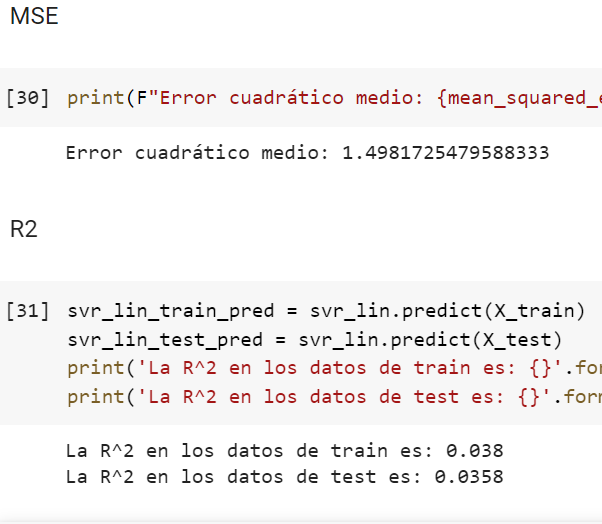

# SVM kernel Polinómico

In [32]:
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1, verbose = True)

svr_poly.fit(X_train, Y_train)

[LibSVM]

SVR(C=100, coef0=1, gamma='auto', kernel='poly', verbose=True)

In [33]:
svr_poly_y_pred = svr_poly.predict(X_test)
svr_poly_y_test_umbralizada = 1 * (svr_poly_y_pred[:, ] > umbral)

Matriz de confusión

In [34]:
print(u"Matriz de confusión\n", confusion_matrix(Y_test,svr_poly_y_test_umbralizada))

Matriz de confusión
 [[   0  258    0    0    0    0]
 [  17 3325    0    0    0    0]
 [   3 3431    0    0    0    0]
 [   0  307    0    0    0    0]
 [   3 2541    0    0    0    0]
 [   0  115    0    0    0    0]]


MSE

In [35]:
print(F"Error cuadrático medio: {mean_squared_error(Y_test, svr_poly_y_pred)}")

Error cuadrático medio: 1.2765975753587075


R2

In [36]:
svr_poly_train_pred = svr_poly.predict(X_train)
svr_poly_test_pred = svr_poly.predict(X_test)
print('La R^2 en los datos de train es: {}'.format(np.round(r2_score(Y_train, svr_poly_train_pred),4)))
print('La R^2 en los datos de test es: {}'.format(np.round(r2_score(Y_test, svr_poly_test_pred),4)))

La R^2 en los datos de train es: 0.1709
La R^2 en los datos de test es: 0.1784


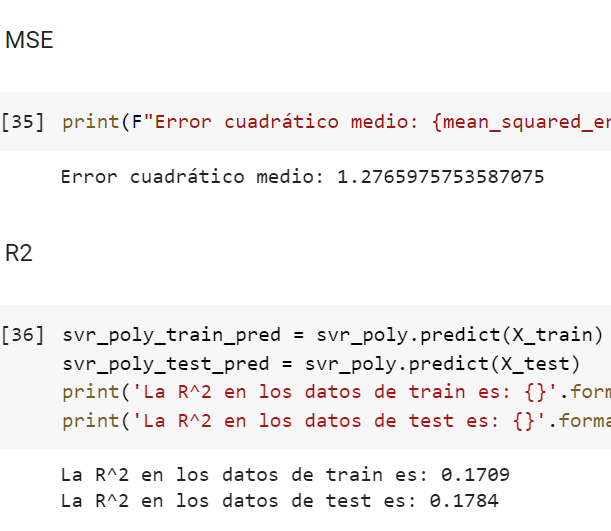

# CONCLUSIONES

Para mí las conclusiones son obvias, el algoritmo con mejor resultado es el de bosques aleatorios ya que ha tenido el mejor resultado en las 3 métricas, seguido de cerca por xgboost.

Los modelos SVM no sólo han tenido predicciones mucho peores, sino que en este caso de regresión han tenido también un coste infinitamente mayor (menos de un segundo de procesamiento en RF comparado con casi 4 horas de SVM polinómico).